<a href="https://colab.research.google.com/github/fereol023/fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation du dataset depuis google drive

In [12]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

data = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


Exploration

In [13]:
line = "============"*4
sep = "\n"
# dimensions de la table des données (propriété shape)
print(data.shape)
print(sep)
# liste des colonnes data.columns
print(line)
print(data.columns)
print(sep)
# liste des colonnes et leurs types (propriété dtypes)
print(line)
print(data.dtypes)
print(sep)
#compter les valeurs nulles
print(line)
print(data.isnull().sum())
print(sep)
#description des données
print(line)
data.describe()

(284807, 31)


Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')


time        int64
v1        float64
v2        float64
v3        float64
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22       float64
v23       float64
v24       float64
v25       float64
v26       float64
v27       float64
v28       float64
amount    float64
class        bool
dtype: object


time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0


,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


Data visualisation

Taille du dataset :  (284807, 31)
Il y a : 492  observations classées dans la classe 1 (fraude).


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


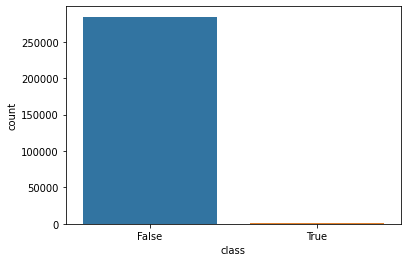

In [14]:
import seaborn as sns

# variable class
target=data["class"]
sns.countplot(target)
print("Taille du dataset : ", data.shape)
print("Il y a :",sum(data["class"])," observations classées dans la classe 1 (fraude).")

In [26]:
sns.pairplot(data)

TypeError: ignored

Error in callback <function flush_figures at 0x7f445d315200> (for post_execute):


KeyboardInterrupt: ignored

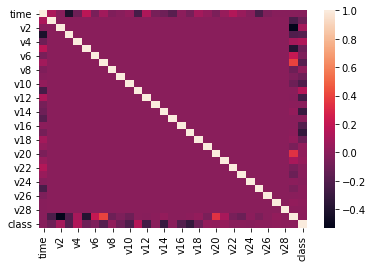

In [27]:
sns.heatmap(data.corr())

On remarque que la variable cible est très déséquilibrée.

In [15]:
# matrice des distributions des variables explicatives 
#pd.plotting.scatter_matrix(data,figsize=(12,12), marker='o',s=20,alpha=0.8)
#plt.show()

Minimal preprocessing

In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

y = data.iloc[:,-1]
X = data.iloc[:,:-1]

print("Matrice des X")
print(X)
print(sep)
print(line)
print(y)

y = LabelBinarizer().fit_transform(y)
print(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Matrice des X
          time         v1         v2        v3        v4        v5        v6  \
0            0  -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0   1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1  -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1  -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2  -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...        ...        ...        ...       ...       ...       ...       ...   
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              v7        v

Minimal estimations : LR, SGD classifier  
Justification : Sachant qu'on a jeu de données de plus de 200 000 observations, il ne serait pas efficace d'utiliser des modèles qui se classent les observations en se basant sur leurs distance par rapport aux autres observations du dataset. Le temps de calcul serait trop long pour chaque output. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[85241    50]
 [   60    92]]
Accuracy score :  99.87  %.
Recall score/taux de vraies fraudes détectées :  60.53  %.
Specificity score/fraudes non détectées :  0.06  %.


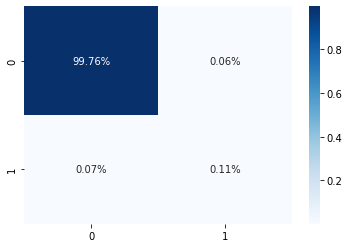

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


[[85226    65]
 [  152     0]]
Accuracy score :  99.75  %.
Recall score/taux de vraies fraudes détectées :  0.0  %.
Specificity score/fraudes non détectées :  0.08  %.


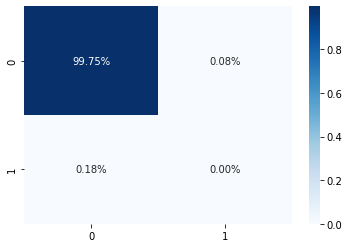

In [17]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from  sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estimation LR
clfLR = LogisticRegression()
clfLR.fit(x_train, y_train)
y_pred = clfLR.predict(x_test)

# Evaluation
acc_scoreLR = accuracy_score(y_test, y_pred)
tprLR = recall_score(y_test, y_pred)
cmLR = confusion_matrix(y_test, y_pred)
fprLR = cmLR[0,1]/(cmLR[0,1]+cmLR[0,0])# spécificité
print(line)
print(cmLR)
print("Accuracy score : ",round(acc_scoreLR*100,2), " %.")
print("Recall score/taux de vraies fraudes détectées : ",round(tprLR*100,2), " %.") 
print("Specificity score/fraudes non détectées : ",round(fprLR*100,2), " %.")

print(line)
sns.heatmap(cmLR/np.sum(cmLR), annot=True, fmt='.2%', cmap="Blues")
plt.show()

# Estimation SGDClassifier
clfSGD = SGDClassifier(loss='squared_error', max_iter=1000)
clfSGD = clfSGD.fit(x_train, y_train)
y_pred = clfSGD.predict(x_test)

# Evaluation
acc_scoreSGD = accuracy_score(y_test, y_pred)
tprSGD = recall_score(y_test, y_pred)
cmSGD = confusion_matrix(y_test, y_pred)
fprSGD = cmSGD[0,1]/(cmSGD[0,1]+cmSGD[0,0])# spécificité
print(line)
print(cmSGD)
print("Accuracy score : ",round(acc_scoreSGD*100,2), " %.")
print("Recall score/taux de vraies fraudes détectées : ",round(tprSGD*100,2), " %.") 
print("Specificity score/fraudes non détectées : ",round(fprSGD*100,2), " %.")

print(line)
sns.heatmap(cmSGD/np.sum(cmSGD), annot=True, fmt='.2%', cmap="Blues")
plt.show()

Le modèle LR détecte 67% des fraudes. 

CROSS VALIDATION : LR

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from statistics import mean, stdev
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X1 = X.copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)

# Feature Scaling for input features.
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
  
# Create  classifier object.
lr = LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_std = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    lr.fit(x_train_fold, y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_std.append(recall_fold)
  
# Print the output
print(sep)
print(line)
print('List of possible recall:', lst_recall_stratified_std)
print('\nMaximum recall That can be obtained from this model is:', max(lst_recall_stratified_std)*100, '%')
print('\nMinimum recall:', min(lst_recall_stratified_std)*100, '%')
print('\nOverall recall:', mean(lst_recall_stratified_std)*100, '%')
print('\nStandard Deviation is:', stdev(lst_recall_stratified_std))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin



List of possible recall: [0.6326530612244898, 0.6122448979591837, 0.673469387755102, 0.5510204081632653, 0.6326530612244898, 0.62, 0.62, 0.5918367346938775, 0.6122448979591837, 0.7142857142857143]

Maximum recall That can be obtained from this model is: 71.42857142857143 %

Minimum recall: 55.10204081632652 %

Overall recall: 62.60408163265306 %

Standard Deviation is: 0.04393896456204005


In [19]:
X1 = X.copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)

# Feature Scaling for input features.
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
  
# Create  classifier object.
lr = LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_mms = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    lr.fit(x_train_fold, y_train_fold)
    y_pred_fold = lr.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_mms.append(recall_fold)
  
# Print the output
print(sep)
print(line)
print('List of possible recall:', lst_recall_stratified_mms)
print('\nMaximum recall That can be obtained from this model is:', max(lst_recall_stratified_mms)*100, '%')
print('\nMinimum recall:', min(lst_recall_stratified_mms)*100, '%')
print('\nOverall recall:', mean(lst_recall_stratified_mms)*100, '%')
print('\nStandard Deviation is:', stdev(lst_recall_stratified_mms))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin



List of possible recall: [0.5306122448979592, 0.46938775510204084, 0.6326530612244898, 0.5306122448979592, 0.5918367346938775, 0.5, 0.56, 0.5102040816326531, 0.5102040816326531, 0.6326530612244898]

Maximum recall That can be obtained from this model is: 63.26530612244898 %

Minimum recall: 46.93877551020408 %

Overall recall: 54.68163265306123 %

Standard Deviation is: 0.05610461064682913


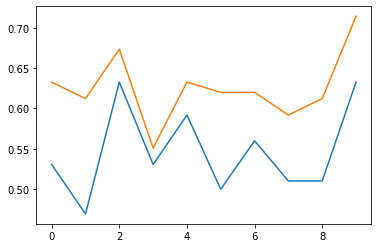

In [20]:
plt.plot(lst_recall_stratified_mms)
plt.plot(lst_recall_stratified_std)
plt.legend(['X standardized', 'X normalized'])
plt.show()

CROSS VALIDATION : SGD

In [21]:
X1 = X.copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)

# Feature Scaling for input features.
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
  
# Create  classifier object.
sgd = SGDClassifier(loss='squared_error', max_iter=5000)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_std = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    sgd.fit(x_train_fold, y_train_fold)
    y_pred_fold = sgd.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_std.append(recall_fold)
  
# Print the output
print(sep)
print(line)
print('List of possible recall:', lst_recall_stratified_std)
print('\nMaximum recall That can be obtained from this model is:', max(lst_recall_stratified_std)*100, '%')
print('\nMinimum recall:', min(lst_recall_stratified_std)*100, '%')
print('\nOverall recall:', mean(lst_recall_stratified_std)*100, '%')
print('\nStandard Deviation is:', stdev(lst_recall_stratified_std))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin



List of possible recall: [0.5102040816326531, 0.0, 0.6938775510204082, 0.24489795918367346, 0.8571428571428571, 0.16, 0.0, 0.0, 0.5306122448979592, 0.0]

Maximum recall That can be obtained from this model is: 85.71428571428571 %

Minimum recall: 0.0 %

Overall recall: 29.967346938775506 %

Standard Deviation is: 0.3241314240610778


In [22]:
X1 = X.copy()
#X1 = X1.drop(['time'], axis=1)
X1 = np.array(X1)

# Feature Scaling for input features.
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
  
# Create  classifier object.
sgd = SGDClassifier(loss='squared_error', max_iter=5000)
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_recall_stratified_mms = []

for train_index, test_index in skf.split(X1, y):
    x_train_fold, x_test_fold = X1[train_index,], X1[test_index,]
    y_train_fold, y_test_fold = y[train_index,], y[test_index,]
    sgd.fit(x_train_fold, y_train_fold)
    y_pred_fold = sgd.predict(x_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    lst_recall_stratified_mms.append(recall_fold)
  
# Print the output
print(sep)
print(line)
print('List of possible recall:', lst_recall_stratified_mms)
print('\nMaximum recall That can be obtained from this model is:', max(lst_recall_stratified_mms)*100, '%')
print('\nMinimum recall:', min(lst_recall_stratified_mms)*100, '%')
print('\nOverall recall:', mean(lst_recall_stratified_mms)*100, '%')
print('\nStandard Deviation is:', stdev(lst_recall_stratified_mms))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/l



List of possible recall: [0.12244897959183673, 0.7755102040816326, 0.08163265306122448, 0.16326530612244897, 0.8775510204081632, 0.24, 0.94, 0.14285714285714285, 0.12244897959183673, 0.04081632653061224]

Maximum recall That can be obtained from this model is: 94.0 %

Minimum recall: 4.081632653061225 %

Overall recall: 35.06530612244898 %

Standard Deviation is: 0.3603265907178408


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


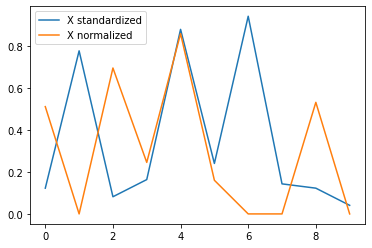

In [25]:
plt.plot(lst_recall_stratified_mms)
plt.plot(lst_recall_stratified_std)
plt.legend(['X standardized', 'X normalized'])
plt.show()